## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd

## load a Data_Set

In [3]:
df = pd.read_csv('trips.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,84776.000000,84677.000000,84776.000000,84776.000000,84677.000000,84677.000000
mean,236.703418,236.978176,41.908156,-87.649319,41.908194,-87.649601
std,160.288883,160.957429,0.043313,0.025170,0.043313,0.025243
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,113.000000,113.000000,41.884600,-87.664400,41.884600,-87.665100
50%,211.000000,212.000000,41.903000,-87.646300,41.903000,-87.646600
75%,324.000000,323.000000,41.932600,-87.631700,41.932600,-87.631700
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400


## Handling missing values

In [6]:
# Perform data cleaning and preprocessing steps as necessary

# Check for missing values
print(df.isnull().sum())

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      99
end_station_id        99
start_lat              0
start_lng              0
end_lat               99
end_lng               99
member_casual          0
dtype: int64


In [7]:
# Handle missing values if any
df.dropna(inplace=True)

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

## EDA (Exploratry Data Analysis)

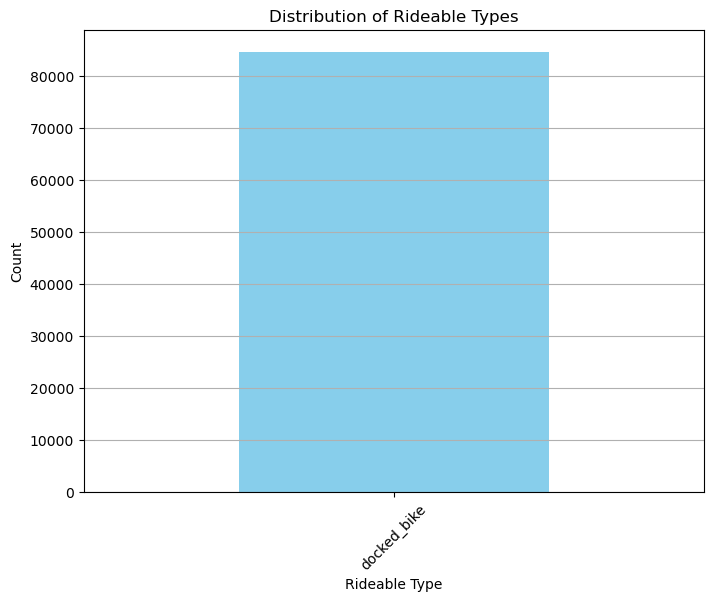

In [9]:
# Example EDA tasks:
# Plot histogram for rideable_type
plt.figure(figsize=(8, 6))
df['rideable_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Rideable Types')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

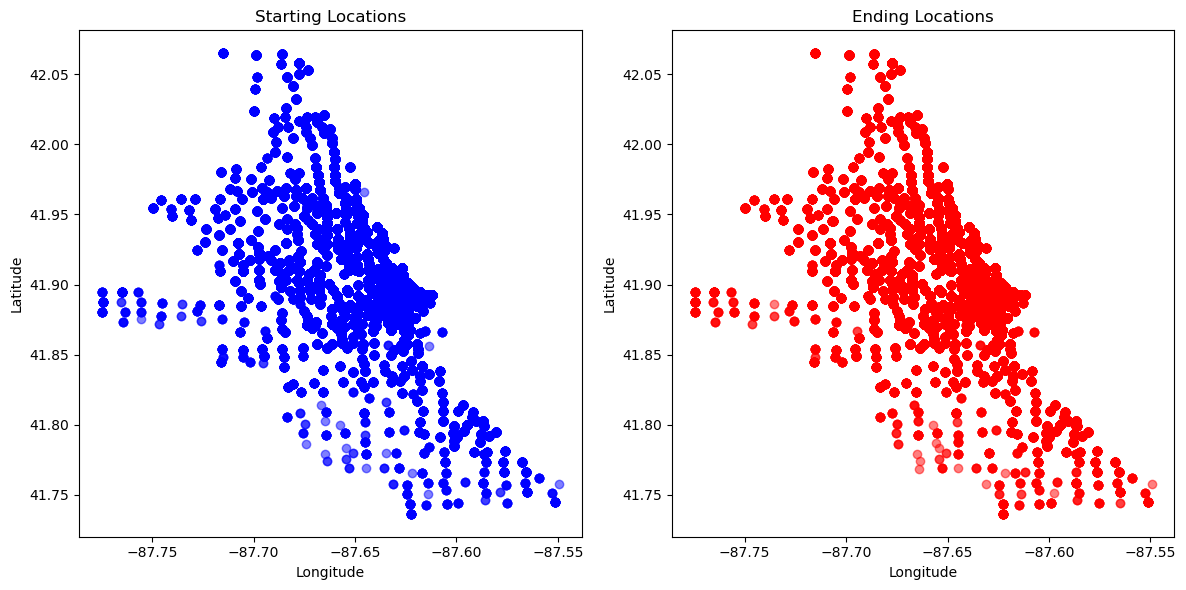

In [10]:
# Scatter plot of starting and ending latitudes and longitudes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['start_lng'], df['start_lat'], alpha=0.5, color='blue')
plt.title('Starting Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(df['end_lng'], df['end_lat'], alpha=0.5, color='red')
plt.title('Ending Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [11]:
# Convert 'started_at' and 'ended_at' columns to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate the duration of each ride in minutes
df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Convert 'rideable_type' and 'member_casual' columns to categorical
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

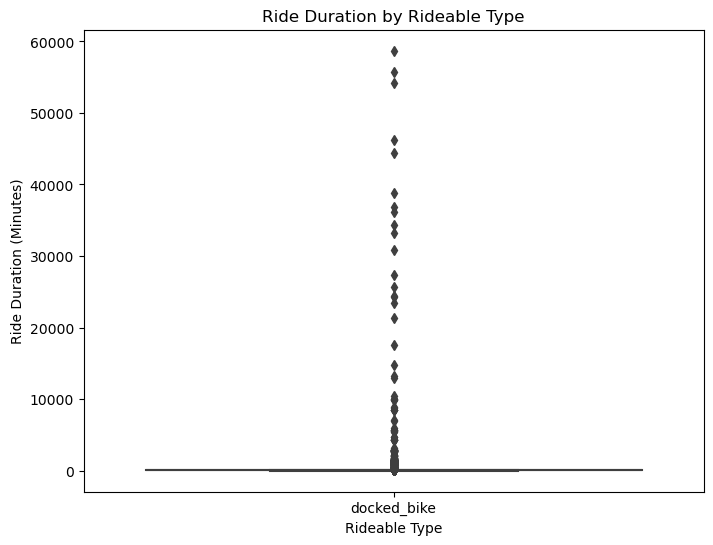

In [12]:
# Explore relationship between rideable type and ride duration
plt.figure(figsize=(8,6))
sns.boxplot(x='rideable_type', y='ride_duration_minutes', data=df)
plt.title('Ride Duration by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Ride Duration (Minutes)')
plt.show()

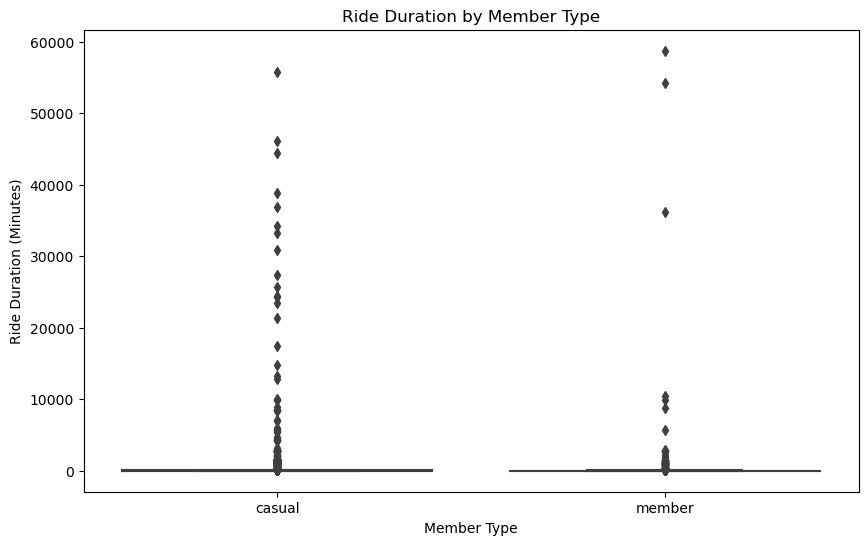

In [13]:
# Explore relationship between member type and ride duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='ride_duration_minutes', data=df)
plt.title('Ride Duration by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Ride Duration (Minutes)')
plt.show()

## relationship

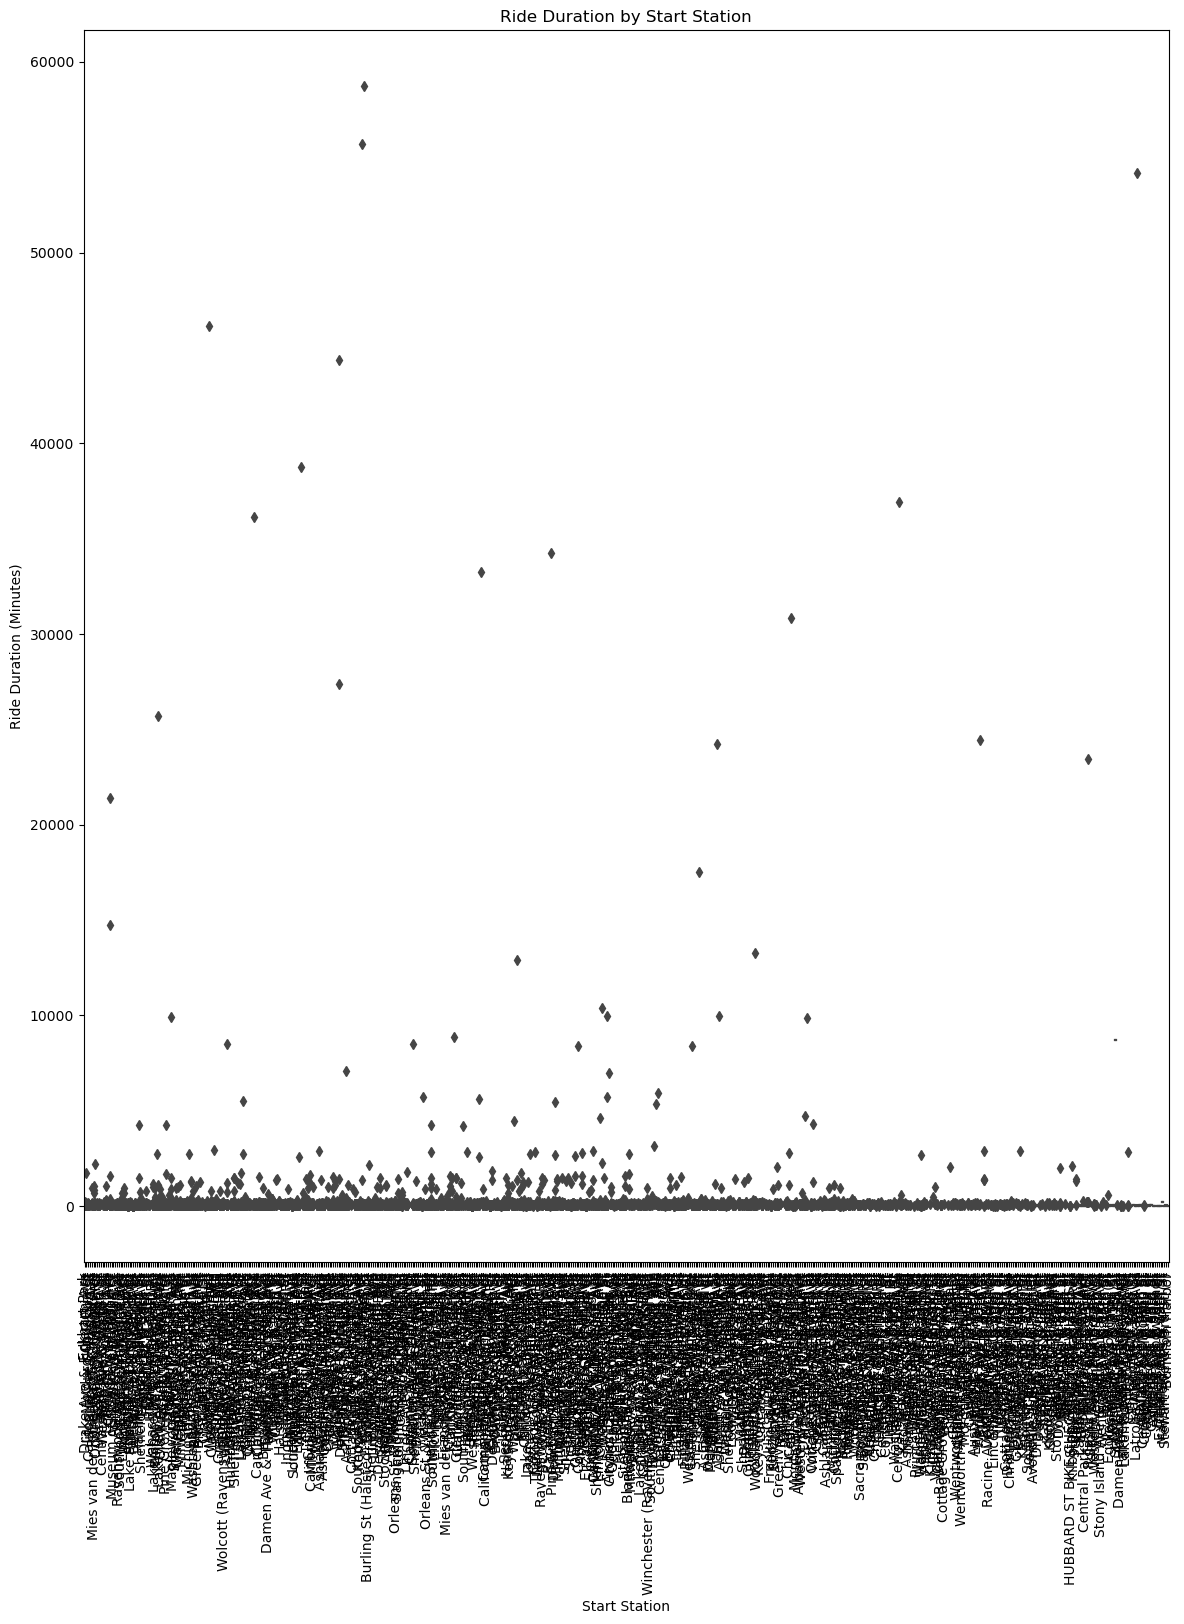

In [14]:
# Explore relationship between start station and ride duration
plt.figure(figsize=(14, 16))
sns.boxplot(x='start_station_name', y='ride_duration_minutes', data=df)
plt.title('Ride Duration by Start Station')
plt.xlabel('Start Station')
plt.ylabel('Ride Duration (Minutes)')
plt.xticks(rotation=90)
plt.show()

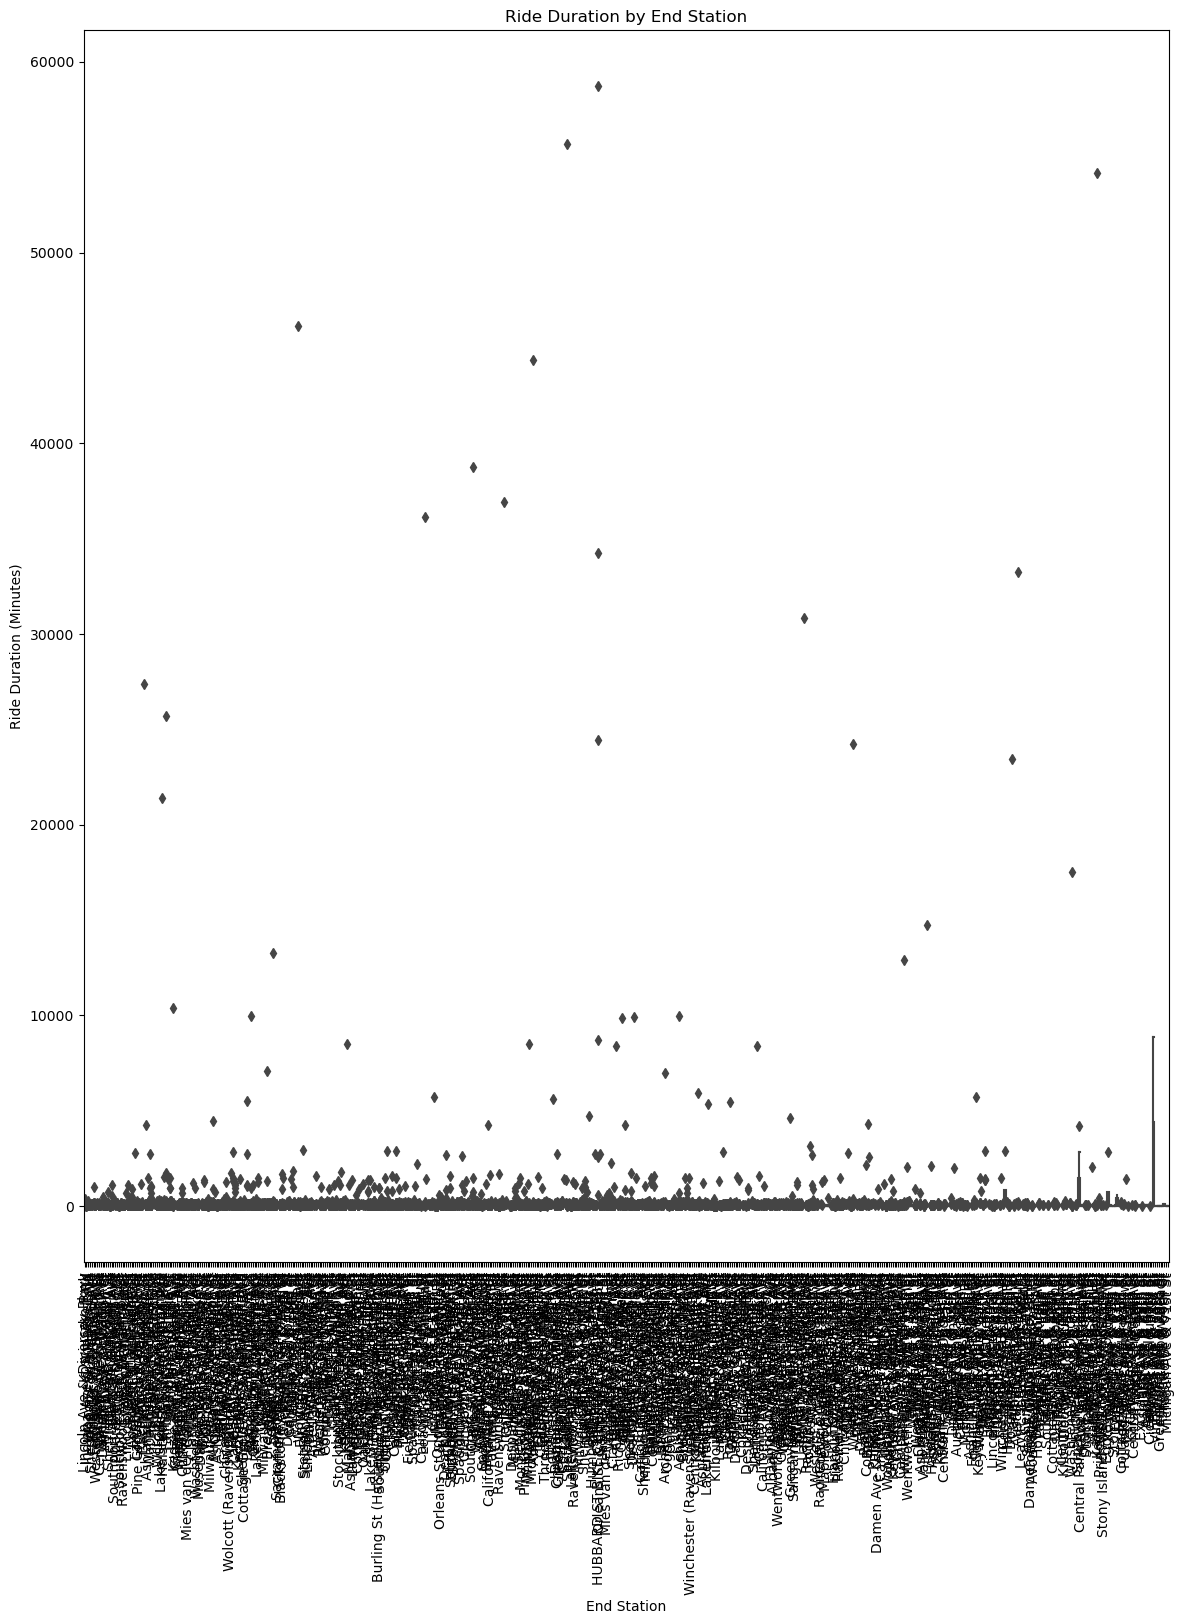

In [15]:
# Explore relationship between end station and ride duration
plt.figure(figsize=(14, 16))
sns.boxplot(x='end_station_name', y='ride_duration_minutes', data=df)
plt.title('Ride Duration by End Station')
plt.xlabel('End Station')
plt.ylabel('Ride Duration (Minutes)')
plt.xticks(rotation=90)
plt.show()

This code performs the following analyses:

Calculates the duration of each ride in minutes.

Explores the relationship between rideable type and ride duration using a boxplot.

Explores the relationship between member type and ride duration using a boxplot.

Explores the relationship between start station and ride duration using a boxplot.

Explores the relationship between end station and ride duration using a boxplot.

## most common start & end stations

In [16]:
# Calculate the most common start stations
top_start_stations = df['start_station_name'].value_counts().head(10)
top_start_stations

start_station_name
Clark St & Elm St               850
Dearborn St & Erie St           730
Desplaines St & Kinzie St       719
St. Clair St & Erie St          686
Clark St & Armitage Ave         625
Wabash Ave & Grand Ave          614
Broadway & Barry Ave            605
Stockton Dr & Wrightwood Ave    584
Larrabee St & Webster Ave       576
Clark St & Schiller St          574
Name: count, dtype: int64

In [17]:
# Calculate the most common end stations
top_end_stations = df['end_station_name'].value_counts().head(10)
top_end_stations

end_station_name
Clark St & Elm St            893
Dearborn St & Erie St        785
St. Clair St & Erie St       695
Desplaines St & Kinzie St    678
Broadway & Barry Ave         675
Wabash Ave & Roosevelt Rd    643
Larrabee St & Webster Ave    612
Wabash Ave & Grand Ave       606
Clark St & Armitage Ave      595
Wells St & Concord Ln        567
Name: count, dtype: int64

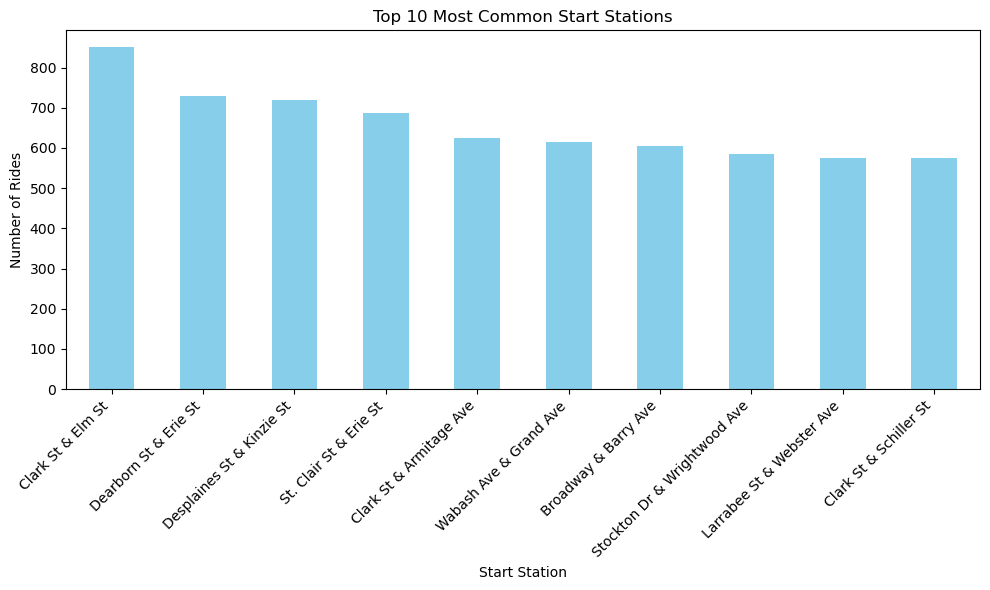

In [18]:
# Plot the top start stations
plt.figure(figsize=(10, 6))
top_start_stations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

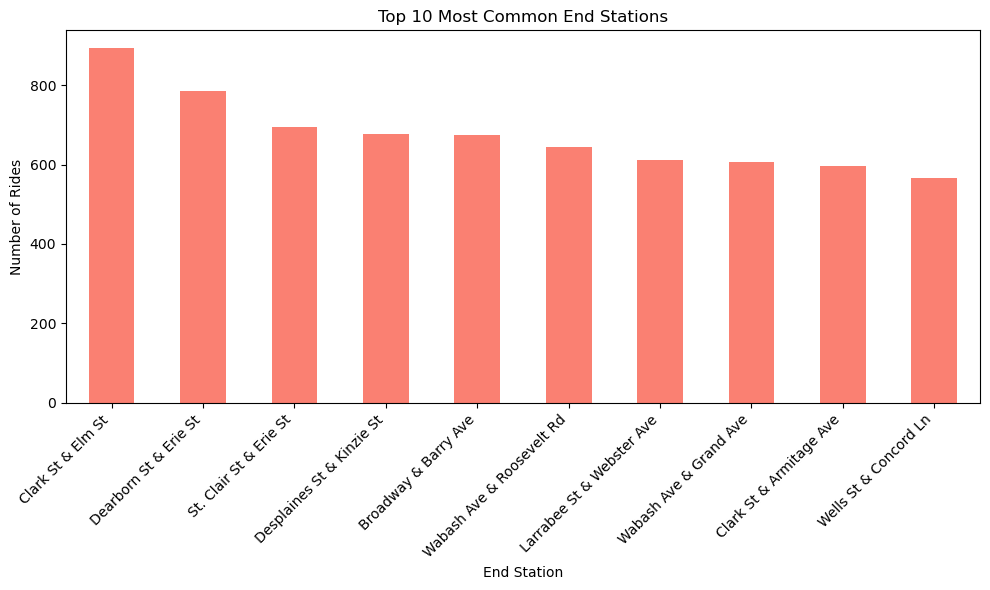

In [19]:
# Plot the top end stations
plt.figure(figsize=(10, 6))
top_end_stations.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Common End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

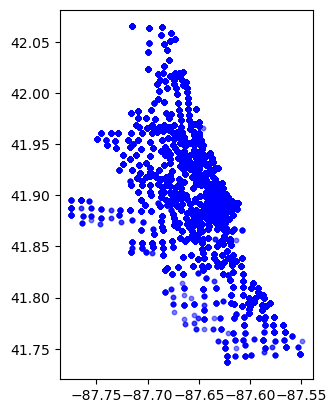

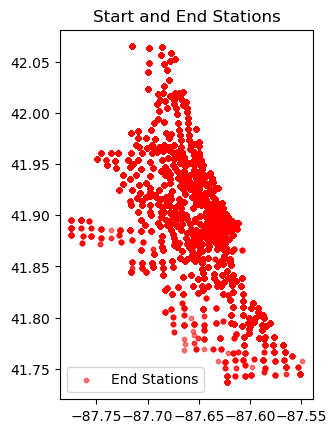

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset with 'start_lng', 'start_lat', 'end_lng', and 'end_lat' columns

# Create GeoDataFrame for start stations
start_geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.start_lng, df.start_lat))

# Create GeoDataFrame for end stations
end_geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.end_lng, df.end_lat))

# Plot start stations
start_geo_df.plot(color='blue', label='Start Stations', alpha=0.5, markersize=10)

# Plot end stations
end_geo_df.plot(color='red', label='End Stations', alpha=0.5, markersize=10)

# Add title and legend
plt.title('Start and End Stations')
plt.legend()

# Show the plot
plt.show()


Station Utilization:

In [27]:
# Analyze the distribution of start and end stations
station_utilization = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
station_utilization

,start_station_name,end_station_name,count
0,2112 W Peterson Ave,2112 W Peterson Ave,5
1,2112 W Peterson Ave,Bosworth Ave & Howard St,1
2,2112 W Peterson Ave,Broadway & Granville Ave,3
3,2112 W Peterson Ave,Broadway & Ridge Ave,3
4,2112 W Peterson Ave,Broadway & Thorndale Ave,2
...,...,...,...
28045,Yates Blvd & 75th St,Phillips Ave & 79th St,1
28046,Yates Blvd & 75th St,Phillips Ave & 83rd St,1
28047,Yates Blvd & 75th St,Racine Ave & 61st St,1
28048,Yates Blvd & 75th St,South Shore Dr & 71st St,1


In [29]:
# Pivot the DataFrame to create a matrix of station counts
station_matrix = station_utilization.pivot(index='start_station_name', columns='end_station_name', values='count')

station_matrix

end_station_name,2112 W Peterson Ave,63rd St Beach,900 W Harrison St,Aberdeen St & Jackson Blvd,Aberdeen St & Monroe St,Aberdeen St & Randolph St,Ada St & Washington Blvd,Adler Planetarium,Albany Ave & 26th St,Albany Ave & Bloomingdale Ave,...,Wood St & 35th St,Wood St & Augusta Blvd,Wood St & Chicago Ave (*),Wood St & Hubbard St,Wood St & Milwaukee Ave,Wood St & Taylor St,Woodlawn Ave & 55th St,Woodlawn Ave & 75th St,Woodlawn Ave & Lake Park Ave,Yates Blvd & 75th St
start_station_name,,,,,,,,,,,,,,,,,,,,,
2112 W Peterson Ave,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63rd St Beach,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900 W Harrison St,NaN,NaN,8.0,9.0,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
Aberdeen St & Jackson Blvd,NaN,NaN,2.0,30.0,NaN,7.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
Aberdeen St & Monroe St,NaN,NaN,2.0,2.0,39.0,3.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood St & Taylor St,NaN,NaN,5.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
Woodlawn Ave & 55th St,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,2.0,NaN
Woodlawn Ave & 75th St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


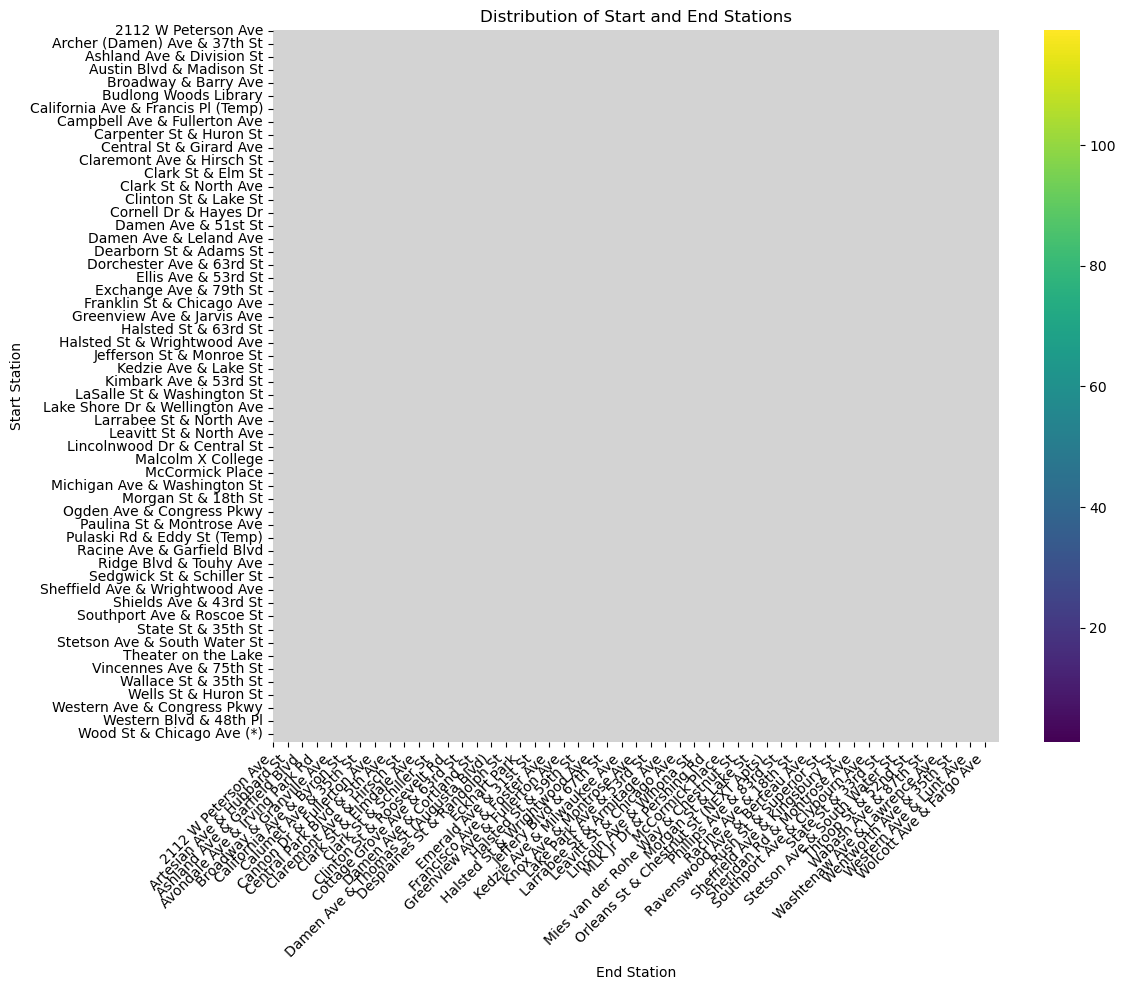

In [30]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(station_matrix, cmap='viridis', linecolor='lightgray', linewidths=0.1)
plt.title('Distribution of Start and End Stations')
plt.xlabel('End Station')
plt.ylabel('Start Station')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Route Patterns:

In [31]:
# Analyze common routes
common_routes = df.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending=False).head(10)
common_routes

start_station_name             end_station_name             
Stockton Dr & Wrightwood Ave   Stockton Dr & Wrightwood Ave     119
Indiana Ave & Roosevelt Rd     Indiana Ave & Roosevelt Rd       113
Clark St & Elm St              Clark St & Elm St                111
Larrabee St & Webster Ave      Larrabee St & Webster Ave        110
Wabash Ave & Grand Ave         Wabash Ave & Grand Ave           101
Clarendon Ave & Gordon Ter     Clarendon Ave & Gordon Ter       101
Dearborn St & Erie St          Dearborn St & Erie St            101
Wells St & Elm St              Wells St & Elm St                 94
California Ave & Montrose Ave  California Ave & Montrose Ave     90
Federal St & Polk St           Federal St & Polk St              87
dtype: int64

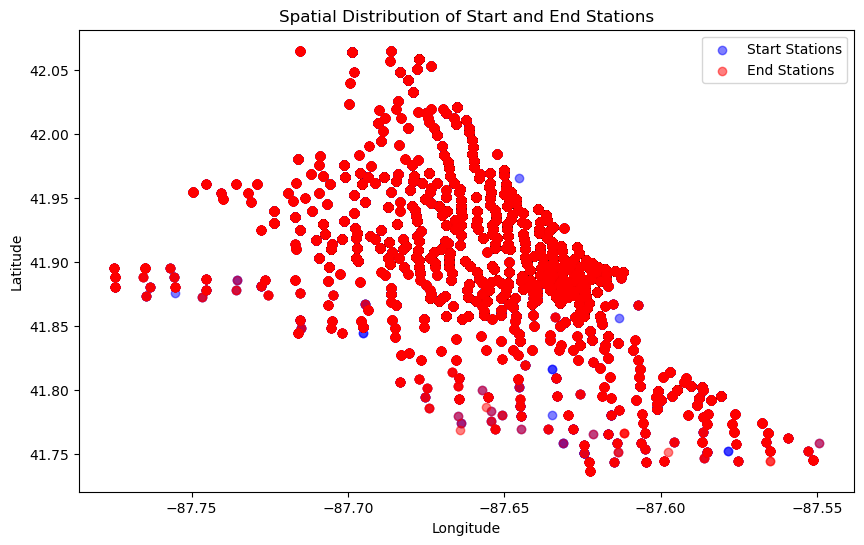

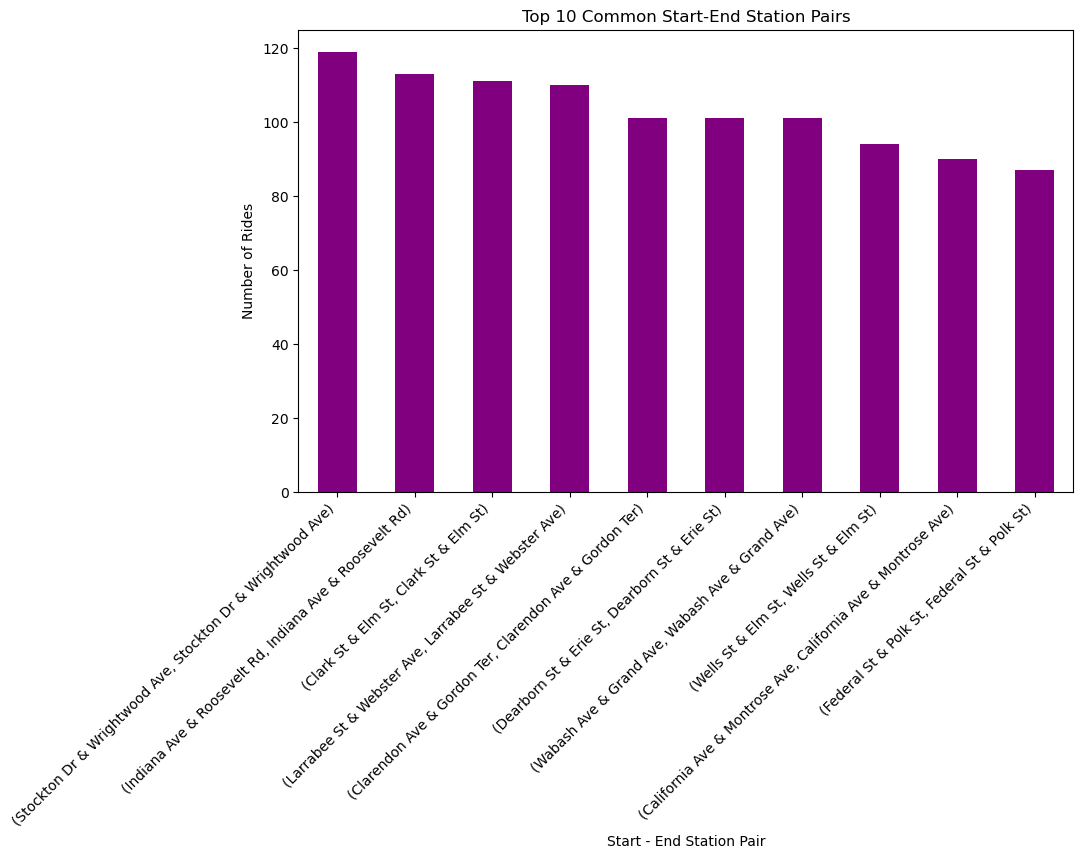

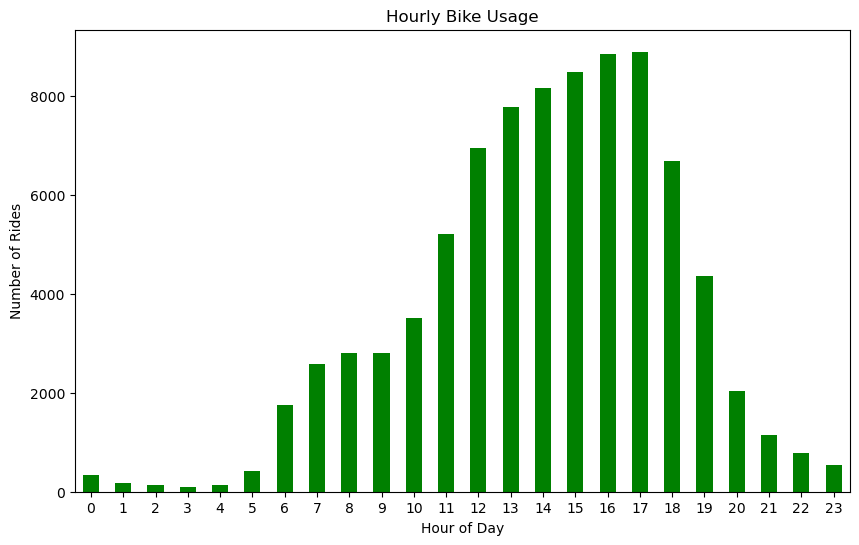

In [32]:
# Common Start and End Stations
top_start_stations = df['start_station_name'].value_counts().head(10)
top_end_stations = df['end_station_name'].value_counts().head(10)

# Spatial Distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['start_lng'], df['start_lat'], color='blue', label='Start Stations', alpha=0.5)
plt.scatter(df['end_lng'], df['end_lat'], color='red', label='End Stations', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Start and End Stations')
plt.legend()
plt.show()

# Station Utilization
common_start_end_stations = df.groupby(['start_station_name', 'end_station_name']).size().nlargest(10)
common_start_end_stations.plot(kind='bar', color='purple', figsize=(10, 6))
plt.xlabel('Start - End Station Pair')
plt.ylabel('Number of Rides')
plt.title('Top 10 Common Start-End Station Pairs')
plt.xticks(rotation=45, ha='right')
plt.show()

# Temporal Trends
df['hour'] = df['started_at'].dt.hour
hourly_usage = df.groupby('hour').size()
hourly_usage.plot(kind='bar', color='green', figsize=(10, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Bike Usage')
plt.xticks(rotation=0)
plt.show()

# User Behavior
member_start_stations = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start_stations = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
